##Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [ ]:
import pandas as pd
import numpy as np
import os,re,datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [ ]:
train=pd.read_csv('train.csv')

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
(train.isna().sum()/train.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

As we can see there are many columns with nan values
Credit_History having 8% nan values, Self_Employed with 5.2%
by dropping nan we might lose around 15% data. We will try to impute values

In [ ]:
#checking duplicates
train.duplicated().sum()

0

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
train[train.Gender.isnull()][['Gender','Loan_Status']]

,Gender,Loan_Status
23,NaN,N
126,NaN,Y
171,NaN,Y
188,NaN,Y
314,NaN,N
334,NaN,Y
460,NaN,Y
467,NaN,Y
477,NaN,N
507,NaN,N


In [ ]:
#Filling missing values
train.Gender.fillna(value=train.Gender.mode()[0],inplace=True)

In [ ]:
train.LoanAmount.median(),train.Credit_History.mode()[0]

(128.0, 1.0)

In [ ]:
#Filling missing values
train.Married.fillna(value=train.Married.mode()[0],inplace=True)
train.Dependents.fillna(value=train.Dependents.mode()[0],inplace=True)
train.Self_Employed.fillna(value=train.Self_Employed.mode()[0],inplace=True)
train.LoanAmount.fillna(value=train.LoanAmount.median(),inplace=True)
train.Loan_Amount_Term.fillna(value=train.Loan_Amount_Term.median(),inplace=True)
train.Credit_History.fillna(value=train.Credit_History.mode()[0],inplace=True)

In [ ]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

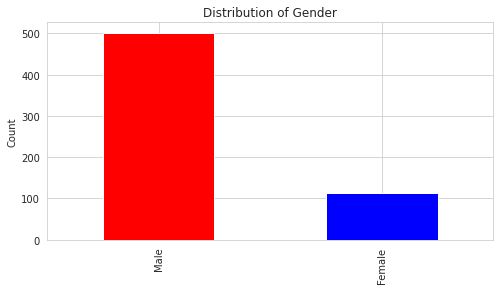

Male      502
Female    112
Name: Gender, dtype: int64

In [ ]:
plt.figure(figsize=(8,4))
colors = ['r','b','b','b','b']
ax=train.Gender.value_counts().plot(kind='bar',color=colors)
plt.title('Distribution of Gender')
plt.ylabel('Count')
plt.show()
train.Gender.value_counts()

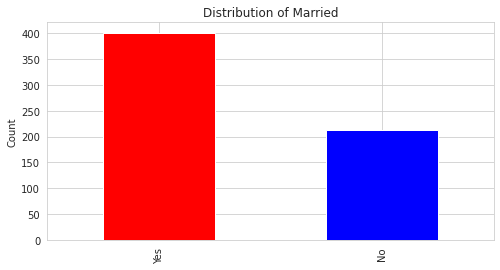

Yes    401
No     213
Name: Married, dtype: int64

In [ ]:
#Married PLOT
plt.figure(figsize=(8,4))
colors = ['r','b','b','b','b']
ax=train.Married.value_counts().plot(kind='bar',color= colors)
plt.title('Distribution of Married')
plt.ylabel('Count')
plt.show()
train.Married.value_counts()

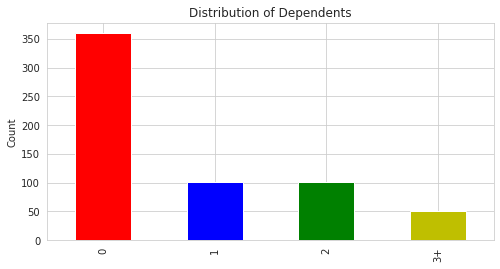

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
#Dependents PLOT
plt.figure(figsize=(8,4))
colors = ['r','b','g','y','b']
ax=train.Dependents.value_counts().plot(kind='bar',color= colors)
plt.title('Distribution of Dependents')
plt.ylabel('Count')
plt.show()
train.Dependents.value_counts()

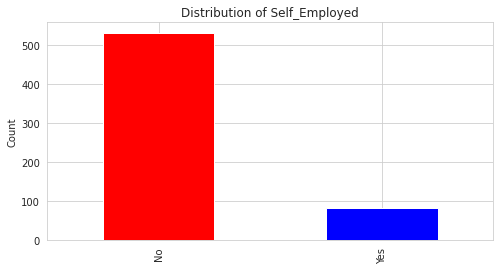

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
#Self_Employed PLOT
plt.figure(figsize=(8,4))
colors = ['r','b','b','b','b']
ax=train.Self_Employed.value_counts().plot(kind='bar',color= colors)
plt.title('Distribution of Self_Employed')
plt.ylabel('Count')
plt.show()
train.Self_Employed.value_counts()

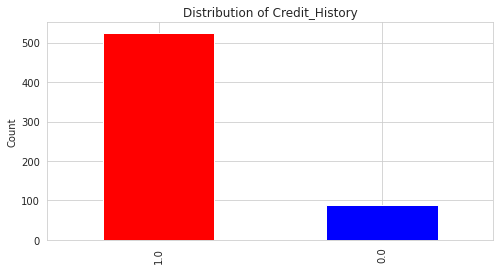

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
#Credit_History PLOT
plt.figure(figsize=(8,4))
colors = ['r','b','b','b','b']
ax=train.Credit_History.value_counts().plot(kind='bar',color= colors)
plt.title('Distribution of Credit_History')
plt.ylabel('Count')
plt.show()
train.Credit_History.value_counts()

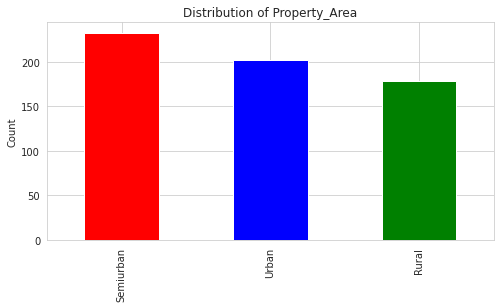

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
#Property_Area PLOT
plt.figure(figsize=(8,4))
colors = ['r','b','g','b','b']
ax=train.Property_Area.value_counts().plot(kind='bar',color= colors)
plt.title('Distribution of Property_Area')
plt.ylabel('Count')
plt.show()
train.Property_Area.value_counts()

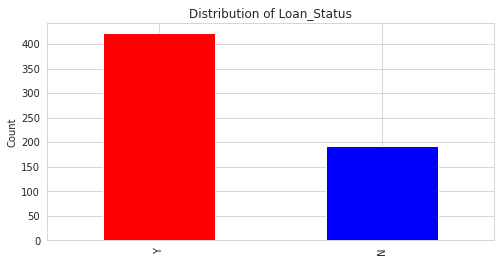

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
#Loan_Status PLOT
plt.figure(figsize=(8,4))
colors = ['r','b','g','b','b']
ax=train.Loan_Status.value_counts().plot(kind='bar',color= colors)
plt.title('Distribution of Loan_Status')
plt.ylabel('Count')
plt.show()
train.Loan_Status.value_counts()

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

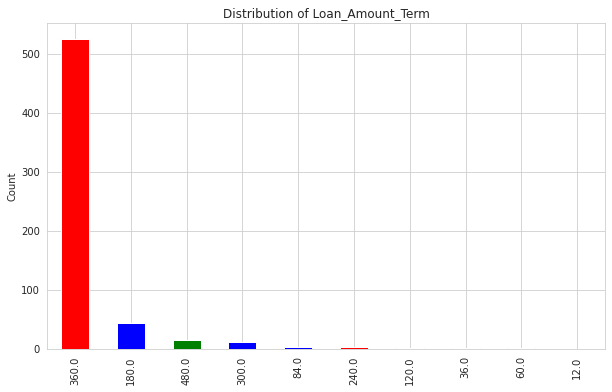

In [ ]:
#Loan_Amount_Term PLOT
plt.figure(figsize=(10,6))
colors = ['r','b','g','b','b']
ax=train.Loan_Amount_Term.value_counts().plot(kind='bar',color= colors)
plt.title('Distribution of Loan_Amount_Term')
plt.ylabel('Count')
plt.show()


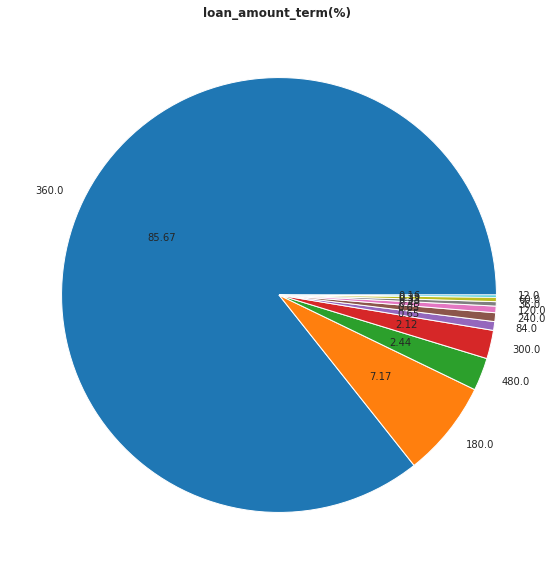

In [ ]:
#pie chart for loan_amount_term
plt.figure(figsize=(20,10))
values=train.Loan_Amount_Term.value_counts()
labels=train.Loan_Amount_Term.value_counts().index
plt.pie(values,labels=labels,autopct='%.2f')
plt.title('loan_amount_term(%) ', weight='bold')
plt.show()

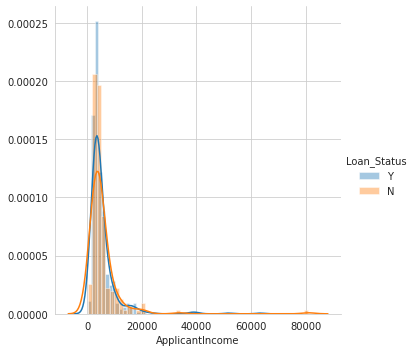

In [ ]:
sns.set_style==('whitegrid');
sns.FacetGrid(train,hue='Loan_Status',size=5).map(sns.distplot,'ApplicantIncome').add_legend();
plt.show()


<Figure size 1080x576 with 0 Axes>

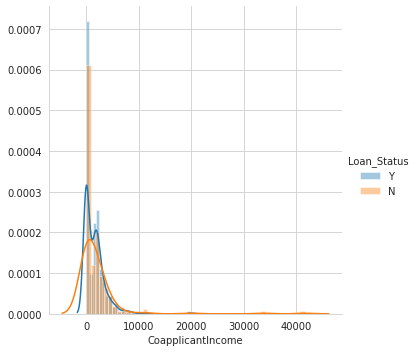

In [ ]:
plt.figure(figsize=(15,8))
sns.set_style==('whitegrid');
sns.FacetGrid(train,hue='Loan_Status',size=5).map(sns.distplot,'CoapplicantIncome').add_legend();
plt.show()


<Figure size 1080x576 with 0 Axes>

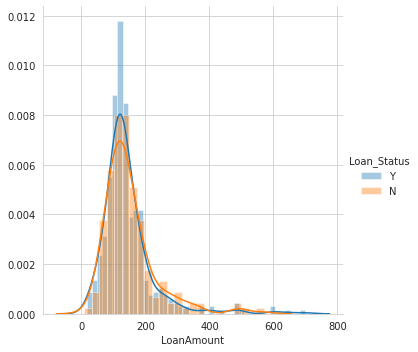

In [ ]:
plt.figure(figsize=(15,8))
sns.set_style==('whitegrid');
sns.FacetGrid(train,hue='Loan_Status',size=5).map(sns.distplot,'LoanAmount').add_legend();
plt.show()


By looking at the pdf plots of LoanAmount,CoapplicantIncome,ApplicantIncome we can see a lot of overlapping.

<Figure size 1080x576 with 0 Axes>

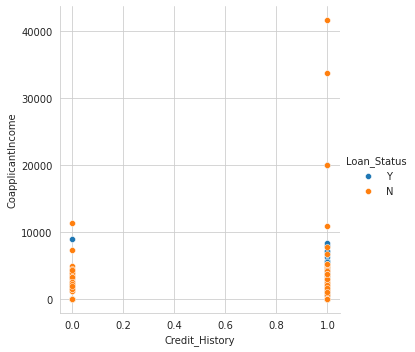

In [ ]:
plt.figure(figsize=(15,8))
sns.set_style==('whitegrid');
sns.FacetGrid(train,hue='Loan_Status',size=5).map(sns.scatterplot,'Credit_History','CoapplicantIncome').add_legend();
plt.show()


<Figure size 1080x576 with 0 Axes>

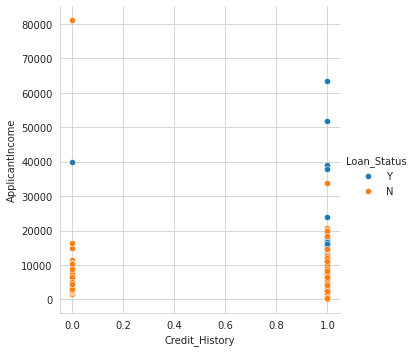

In [ ]:
plt.figure(figsize=(15,8))
sns.set_style==('whitegrid');
sns.FacetGrid(train,hue='Loan_Status',size=5).map(sns.scatterplot,'Credit_History','ApplicantIncome').add_legend();
plt.show()


<Figure size 1080x576 with 0 Axes>

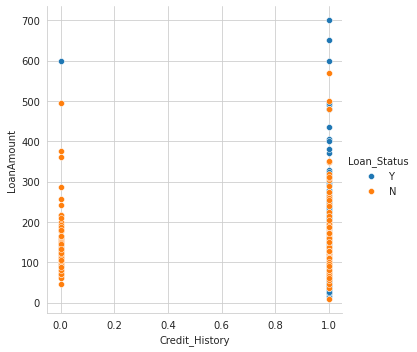

In [ ]:
plt.figure(figsize=(15,8))
sns.set_style==('whitegrid');
sns.FacetGrid(train,hue='Loan_Status',size=5).map(sns.scatterplot,'Credit_History','LoanAmount').add_legend();
plt.show()


Text(0.5, 1.0, 'Loan_Status vs Gender')

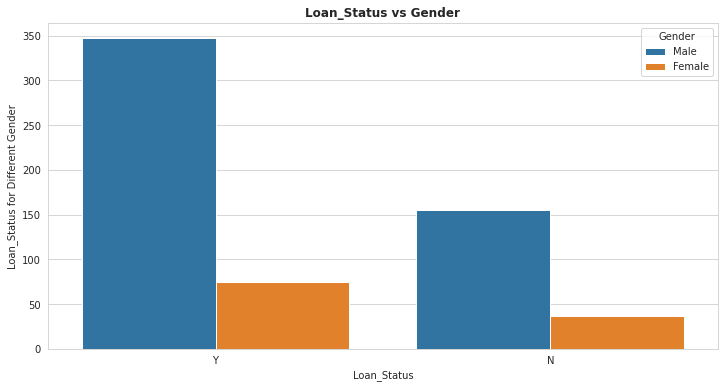

In [ ]:

plt.figure(figsize = (12,6))
sns.countplot(x=train['Loan_Status'], hue = train['Gender'])
plt.ylabel("Loan_Status for Different Gender")
plt.title("Loan_Status vs Gender",weight = 'bold')

Rejection and approval of female applicants are low as compared to male applicants

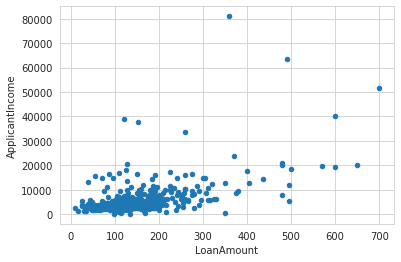

In [ ]:
# Scatter plot of ApplicantIncome and LoanAmount
train.plot('LoanAmount','ApplicantIncome', kind ='scatter')

Cat-Cat plots

In [ ]:
# print the cross-tabulation

ct=pd.crosstab(train.Gender,train.Loan_Status,margins=True)
print(ct)

Loan_Status    N    Y  All
Gender                    
Female        37   75  112
Male         155  347  502
All          192  422  614


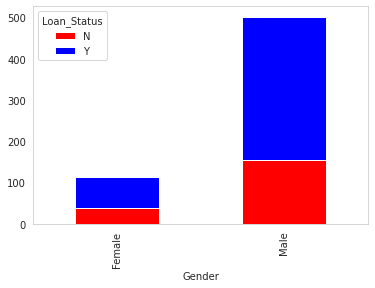

In [ ]:
ct.iloc[:-1,:-1].plot(kind = 'bar', stacked = True, color = ['red','blue'], grid = False)

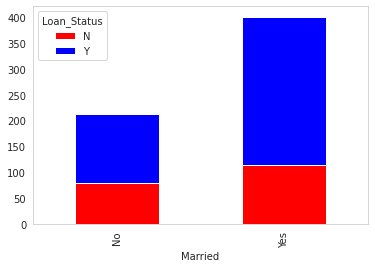

In [ ]:
ct=pd.crosstab(train.Married,train.Loan_Status,margins=True)
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

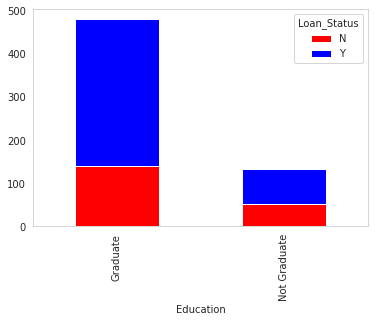

In [ ]:
ct=pd.crosstab(train.Education,train.Loan_Status,margins=True)
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'],grid=False)
plt.show()

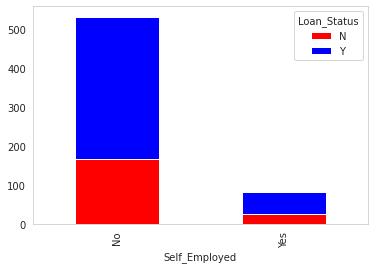

In [ ]:
ct=pd.crosstab(train.Self_Employed,train.Loan_Status,margins=True)
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'],grid=False)
plt.show()

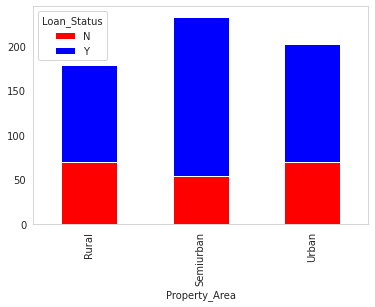

In [ ]:
ct=pd.crosstab(train.Property_Area,train.Loan_Status,margins=True)
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'],grid=False)
plt.show()

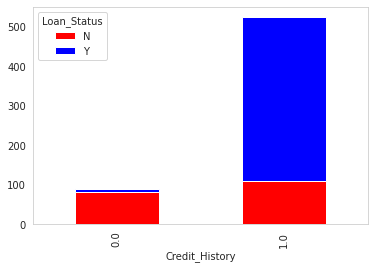

In [ ]:
ct=pd.crosstab(train.Credit_History,train.Loan_Status,margins=True)
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'],grid=False)
plt.show()

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Getting new Data Columns

We have two columns named applicant income and co-applicant income. It may be the case that total income might have a great impact on Loan Status. This is just a guess. It may or may not work. Also It may be the case that EMI would have a greater impact on Loan Status as it combines Loan Amount and Loan Amount Term. So I am just using some common sense to find new variables that can impact. Well this concept in short is known as Feature Engineering. (It’s not as easy as what is explained here….But to make our model better ..we are approaching this way…..)

In [ ]:
train['Total_Income']=train.ApplicantIncome+train.CoapplicantIncome

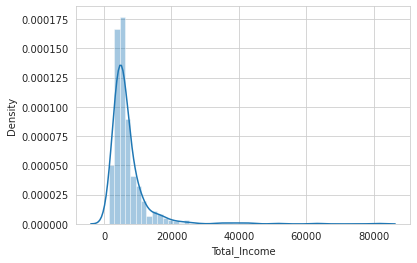

In [ ]:
sns.distplot(train.Total_Income)

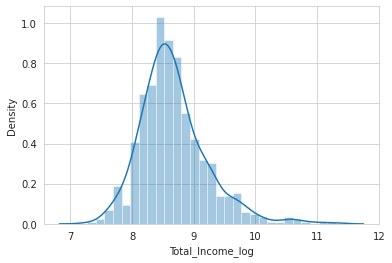

In [ ]:
train['Total_Income_log']=np.log(train.Total_Income)
sns.distplot(train.Total_Income_log)

Applying the log function removes the skewness of data and makes it normal. As total income is skewed i have applied log of that which makes it normal so that many machine learning algorithms can be applied smoothly.

#Adding one more Feature: EMI
A = PxRx(1+R)^N

B = (1+R)^(N-1)

EMI = A/B.

ref: https://www.myloancare.in/home-loan-interest-rates/
EMI could be a big factor in determining the approval as high emi amount might lower chances of approval.


In [ ]:
train['EMI']=(train.LoanAmount*0.09*(1.09**train.Loan_Amount_Term))/(1.09**(train.Loan_Amount_Term-1))


In [ ]:
#pd.get_dummies ==> Convert categorical variable into dummy/indicator variables.(OneHot encoding)
train.Gender=pd.get_dummies(train.Gender,drop_first=True)
train.Married=pd.get_dummies(train.Married,drop_first=True)
train.Dependents=pd.get_dummies(train.Dependents,drop_first=True)
train.Education=pd.get_dummies(train.Education,drop_first=True)
train.Self_Employed=pd.get_dummies(train.Self_Employed,drop_first=True)
train.Property_Area=pd.get_dummies(train.Property_Area,drop_first=True)
train.Loan_Amount_Term=pd.get_dummies(train.Loan_Amount_Term,drop_first=True)

In [ ]:
train.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,train['Loan_Status'],stratify=train['Loan_Status'],test_size = 0.2,random_state = 95)

In [ ]:
from joblib import dump,load

dump(X_train, 'more_feature_X_train')
dump(X_test, 'more_feature_X_test')
dump(y_train, 'more_feature_y_train')
dump(y_test, 'more_feature_y_test')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(-1,1))

In [ ]:
applicant_income=mms.fit_transform(np.array(X_train.ApplicantIncome).reshape(-1,1))

In [ ]:
coapplicant_income=mms.fit_transform(np.array(X_train.CoapplicantIncome).reshape(-1,1))
loan_amount=mms.fit_transform(np.array(X_train.LoanAmount).reshape(-1,1))

emi=mms.fit_transform(np.array(X_train.EMI).reshape(-1,1))
total_amount=mms.fit_transform(np.array(X_train.Total_Income).reshape(-1,1))
total_amount_log=mms.fit_transform(np.array(X_train.Total_Income_log).reshape(-1,1))

applicant_income=mms.fit_transform(np.array(X_train.ApplicantIncome).reshape(-1,1))

In [ ]:
applicant_income1=mms.fit_transform(np.array(X_test.ApplicantIncome).reshape(-1,1))
coapplicant_income1=mms.fit_transform(np.array(X_test.CoapplicantIncome).reshape(-1,1))
loan_amount1=mms.fit_transform(np.array(X_test.LoanAmount).reshape(-1,1))
emi1=mms.fit_transform(np.array(X_test.EMI).reshape(-1,1))
total_amount1=mms.fit_transform(np.array(X_test.Total_Income).reshape(-1,1))
total_amount_log1=mms.fit_transform(np.array(X_test.Total_Income_log).reshape(-1,1))



In [ ]:
## combine all 'one-hot' encoded features as Te.
tr =pd.DataFrame(pd.np.column_stack([ applicant_income,coapplicant_income,loan_amount,total_amount,total_amount_log,emi]))

## CONCAT both dataframe ### ie Te and X_test(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l3=X_train.values.tolist()
l4=tr.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

X_train=pd.DataFrame(l3,columns=X_train.columns.tolist()+tr.columns.tolist())
X_train.shape

In [ ]:
X_train.head()

In [ ]:
# after onehot encoding DONE. 'location','rest_type','cuisines' are redundant features. REMOVE them.

X_train =X_train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','EMI','Total_Income_log','Total_Income'],axis = 1)


In [ ]:
## combine all 'one-hot' encoded features as Te.
te =pd.DataFrame(pd.np.column_stack([ applicant_income1,coapplicant_income1,loan_amount1,total_amount1,total_amount_log1,emi1]))

## CONCAT both dataframe ### ie Te and X_test(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l3=X_test.values.tolist()
l4=te.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

X_test=pd.DataFrame(l3,columns=X_test.columns.tolist()+te.columns.tolist())
X_test =X_test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','EMI','Total_Income_log','Total_Income'],axis = 1)
X_test.shape

In [ ]:
y_train=X_train['Loan_Status']

In [ ]:
X_train.drop('Loan_Status',axis=1,inplace=True)

In [ ]:
y_train

#MODELING


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold
from sklearn import metrics

In [ ]:
score1=0
i=1
params={'C':[10**i for i in range(-3,3)]}
kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=95)
for tr,te in kf.split(X_train,y_train):
  print('{} of kfold {}'.format(i,kf.n_splits))
  #print(te)
  x1,x2=X_train.loc[tr],X_train.loc[te]
  y1,y2=y_train.loc[tr],y_train.loc[te]
  model2=GridSearchCV(LogisticRegression(random_state=95),param_grid=params,scoring='accuracy')
  model2.fit(x1,y1)
  pred_test=model2.predict(x2)
  score=metrics.accuracy_score(y2,pred_test)
  score1+=score
  print('accuracy_score',score)
  i+=1

1 of kfold 10
accuracy_score 0.74
2 of kfold 10
accuracy_score 0.8163265306122449
3 of kfold 10
accuracy_score 0.8775510204081632
4 of kfold 10
accuracy_score 0.7346938775510204
5 of kfold 10
accuracy_score 0.8571428571428571
6 of kfold 10
accuracy_score 0.8163265306122449
7 of kfold 10
accuracy_score 0.7755102040816326
8 of kfold 10
accuracy_score 0.7959183673469388
9 of kfold 10
accuracy_score 0.8571428571428571
10 of kfold 10
accuracy_score 0.8367346938775511


#Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
score2=0
i=1
params={}
kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=95)
for tr,te in kf.split(X_train,y_train):
  print('{} of kfold {}'.format(i,kf.n_splits))
  #print(te)
  x1,x2=X_train.loc[tr],X_train.loc[te]
  y1,y2=y_train.loc[tr],y_train.loc[te]
  model=GridSearchCV(GaussianNB(),param_grid=params,scoring='accuracy')
  model.fit(x1,y1)
  pred_test=model.predict(x2)
  score=metrics.accuracy_score(y2,pred_test)
  score2+=score
  print('accuracy_score',score)
  i+=1

1 of kfold 10
accuracy_score 0.72
2 of kfold 10
accuracy_score 0.8163265306122449
3 of kfold 10
accuracy_score 0.8775510204081632
4 of kfold 10
accuracy_score 0.7142857142857143
5 of kfold 10
accuracy_score 0.8571428571428571
6 of kfold 10
accuracy_score 0.8367346938775511
7 of kfold 10
accuracy_score 0.7755102040816326
8 of kfold 10
accuracy_score 0.7959183673469388
9 of kfold 10
accuracy_score 0.8571428571428571
10 of kfold 10
accuracy_score 0.8367346938775511


In [ ]:
test=pd.read_csv('test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
#Filling missing values
test.Married.fillna(value=test.Married.mode()[0],inplace=True)
test.Dependents.fillna(value=test.Dependents.mode()[0],inplace=True)
test.Self_Employed.fillna(value=test.Self_Employed.mode()[0],inplace=True)
test.LoanAmount.fillna(value=test.LoanAmount.median(),inplace=True)
test.Loan_Amount_Term.fillna(value=test.Loan_Amount_Term.median(),inplace=True)
test.Credit_History.fillna(value=test.Credit_History.mode()[0],inplace=True)
#Filling missing values
test.Gender.fillna(value=test.Gender.mode()[0],inplace=True)
#pd.get_dummies ==> Convert categorical variable into dummy/indicator variables.(OneHot encoding)
test.Gender=pd.get_dummies(test.Gender,drop_first=True)
test.Married=pd.get_dummies(test.Married,drop_first=True)
test.Dependents=pd.get_dummies(test.Dependents,drop_first=True)
test.Education=pd.get_dummies(test.Education,drop_first=True)
test.Self_Employed=pd.get_dummies(test.Self_Employed,drop_first=True)
test.Property_Area=pd.get_dummies(test.Property_Area,drop_first=True)
test.Loan_Amount_Term=pd.get_dummies(test.Loan_Amount_Term,drop_first=True)

In [ ]:
test['EMI']=(test.LoanAmount*0.09*(1.09**test.Loan_Amount_Term))/(1.09**(test.Loan_Amount_Term-1))
test['Total_Income']=test.ApplicantIncome+test.CoapplicantIncome
test['Total_Income_log']=np.log(test.Total_Income)

In [ ]:
coapplicant_income=mms.fit_transform(np.array(test.CoapplicantIncome).reshape(-1,1))
loan_amount=mms.fit_transform(np.array(test.LoanAmount).reshape(-1,1))

emi=mms.fit_transform(np.array(test.EMI).reshape(-1,1))
total_amount=mms.fit_transform(np.array(test.Total_Income).reshape(-1,1))
total_amount_log=mms.fit_transform(np.array(test.Total_Income_log).reshape(-1,1))

applicant_income=mms.fit_transform(np.array(test.ApplicantIncome).reshape(-1,1))

In [ ]:
## combine all 'one-hot' encoded features as Te.
tr =pd.DataFrame(pd.np.column_stack([ applicant_income,coapplicant_income,loan_amount,total_amount,total_amount_log,emi]))

## CONCAT both dataframe ### ie Te and X_test(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l3=test.values.tolist()
l4=tr.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

test=pd.DataFrame(l3,columns=test.columns.tolist()+tr.columns.tolist())
test.shape

(367, 20)

In [ ]:
test =test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','EMI','Total_Income_log','Total_Income'],axis = 1)

In [ ]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,0,1,2,3,4,5
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.842270,-1.000000,-0.685824,-0.888087,-0.366088,-1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.915179,-0.875000,-0.624521,-0.920417,-0.486101,-1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.862124,-0.850000,-0.310345,-0.857565,-0.273069,-1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.935474,-0.787833,-0.724138,-0.911656,-0.450847,-1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.909664,-1.000000,-0.808429,-0.957156,-0.665843,-1.0


In [ ]:
pred_test_sub=model.predict(test)
pred_test_prob=model.predict_proba(test)[:,1]
print('average accuracy',score1/10)

average accuracy 0.810734693877551


In [ ]:
pred_test_sub2=model2.predict(test)
pred_test_prob2=model2.predict_proba(test)[:,1]
print('average accuracy',score2/10)

average accuracy 0.808734693877551


In [ ]:
pred_test_sub

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [ ]:
submission=pd.read_csv('test.csv')


In [ ]:
submission['Loan_Status']=pred_test_sub

In [ ]:
subs=submission[['Loan_ID','Loan_Status']]

In [ ]:
subs.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
subs.to_csv('sub_loan.csv',index=False)

In [ ]:
submission2=pd.read_csv('test.csv')
submission2['Loan_Status']=pred_test_sub

In [ ]:
subs2=submission2[['Loan_ID','Loan_Status']]

In [ ]:
subs2.to_csv('sub_loan2.csv',index=False)